In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os

In [3]:
credit= pd.read_csv("credit_train.csv")
credit.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


# EXPLORATORY DATA ANALYSIS  EDA 

In [4]:
#checking for the count of duplicate value
credit.duplicated().sum()

10728

In [5]:
#removing duplicate rows for the dataframe and also cheking for the new dimension of the data frame after dropping duplicate  
credit.drop_duplicates(inplace = True)
credit.shape

(89786, 19)

In [6]:
#generating descriptive statistics of the dataframe
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.978500e+04,70631.000000,7.063100e+04,89785.000000,89785.000000,41448.000000,89785.000000,89785.000000,8.978500e+04,8.978300e+04,89595.000000,89776.000000
mean,1.306089e+07,1130.830598,1.375894e+06,18396.906410,18.248642,34.975873,11.123250,0.164983,2.940351e+05,7.756565e+05,0.115531,0.028605
std,3.329556e+07,1571.037395,1.104852e+06,12145.282372,7.034607,22.008585,4.998884,0.478010,3.722277e+05,8.803517e+06,0.347919,0.255108
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,708.000000,8.479320e+05,10157.400000,13.500000,16.000000,8.000000,0.000000,1.129360e+05,2.770680e+05,0.000000,0.000000
50%,3.138740e+05,729.000000,1.168975e+06,16140.310000,17.000000,32.000000,10.000000,0.000000,2.097220e+05,4.726920e+05,0.000000,0.000000
75%,5.323780e+05,742.000000,1.648915e+06,23918.910000,21.700000,51.000000,14.000000,0.000000,3.675170e+05,7.914500e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
#checking the count of null values
credit.isna().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [8]:
#observation of all the columns
credit.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [9]:
#checking through for unique occurrences
credit.value_counts

<bound method DataFrame.value_counts of                                      Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
99996   06eba04f-58fc-424a-b666-ed72aa008900   
99997   e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7   
99998   81ab928b-d1a5-4523-9a3c-271ebb01b4fb   
99999   c63916c6-6d46-47a9-949a-51d09af4414f   
100000                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid   

In [10]:
#recheking for the size of the dataframe
credit.shape

(89786, 19)

In [11]:
# Summary to all colums 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(credit)

,column,dtypes,nunique,sum_null
0,Loan ID,object,81999,1
1,Customer ID,object,81999,1
2,Loan Status,object,2,1
3,Current Loan Amount,float64,22004,1
4,Term,object,2,1
5,Credit Score,float64,324,19155
6,Annual Income,float64,36174,19155
7,Years in current job,object,11,3803
8,Home Ownership,object,4,1
9,Purpose,object,16,1


In [12]:
#understanding the structure and content of the dataframe
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  

In [13]:
#count of all unique values in the dataframe
credit.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [14]:
#total count of allnull values
credit.isna().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [15]:
# dropping 2 columns 'Loan ID', 'Customer ID' bz both the them have all unique data.
columns_to_drop = ["Loan ID", "Customer ID"]
existing_columns = credit.columns.intersection(columns_to_drop)
credit.drop(existing_columns, axis=1, inplace=True)

In [16]:
credit.drop_duplicates(inplace = True)
credit

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


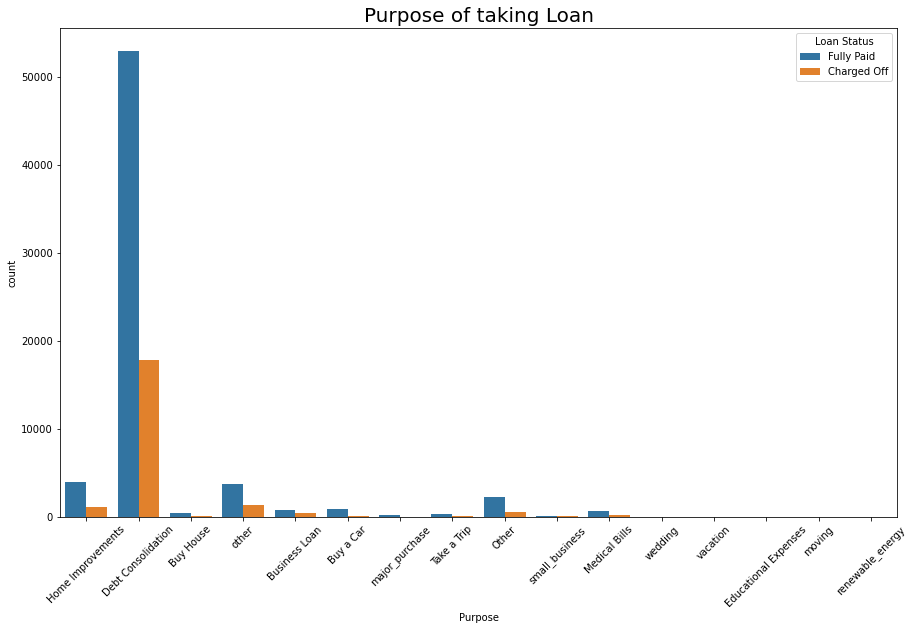

In [17]:
#The diagram below show the purpose of loan taking, Majority of the loan was taken for the purpose of Debt consolidations also
#the major part of it has been fully paid
plt.figure(figsize=(15,9))
sns.countplot(x="Purpose",data=credit,hue="Loan Status")
plt.xticks(rotation=45)
plt.title("Purpose of taking Loan",fontdict={"fontsize":20})
plt.show()

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

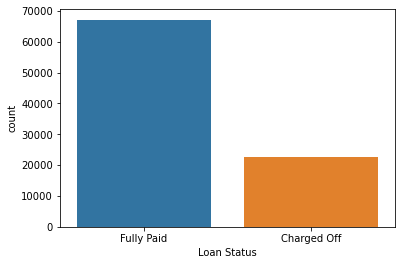

In [18]:
#The image below show the loan status of the loans taken, over 60,0000 counts of the loans has been fully paid, 
#which will siginficanlty reduce Non performing loans
sns.countplot(x="Loan Status", data = credit)

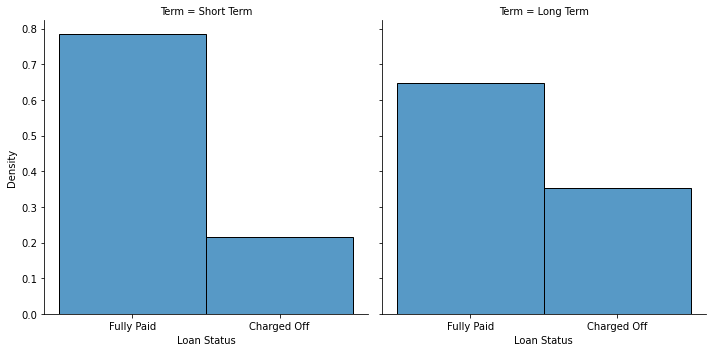

In [19]:
#The Diagram below is just a compairson between the loan status (Long term and short term loan based on their repayment level)
sns.displot(credit,x="Loan Status", col="Term", stat="density",common_norm=False)

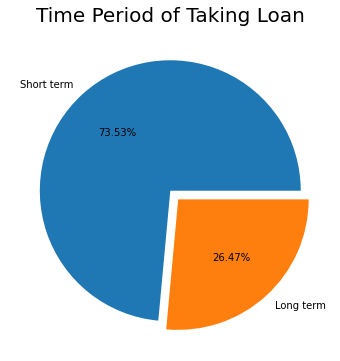

In [20]:
#The visualization below show the time period of the loan taking, over 70% was taken on a short term basic.
#Short term loans varies but it is always lesser than a year < 1 years.
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(6,6))
plt.pie(x=credit["Term"].value_counts(),labels=['Short term','Long term'],autopct='%.2f%%',explode=[0,0.09])
plt.title("Time Period of Taking Loan",fontdict={"fontsize":20})
plt.show()

# Credit Score Ranges

This is an analysis on the credit score of the customers.Credit scores is just the numercial representaion of an individual creditworthiness

In [21]:
credit["Credit Score"].describe()

count    70631.000000
mean      1130.830598
std       1571.037395
min        585.000000
25%        708.000000
50%        729.000000
75%        742.000000
max       7510.000000
Name: Credit Score, dtype: float64

N:B Credit score range is 300 to 850 so values above 850 are invalid
it may be a typo , a zero is added to the original score

In [22]:
#This function aims to handle a potential data error in the "Credit Score" column by dividing the values greater than 850 by 10. This assumes that any value greater than 850 is likely a data entry error, as the typical credit score range is between 300 and 850. By dividing these values by 10, the function attempts to correct the error and bring them within a more reasonable range
def credit_error(value):
    credit_value = value
    credit_value["Credit Score"] = np.where(value["Credit Score"] > 850, value["Credit Score"].values /10, value["Credit Score"])
    return credit_value

In [23]:
credit_error(credit)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [24]:
credit_score = credit["Credit Score"]
description = credit_score.describe()
description

count    70631.000000
mean       718.579476
std         28.126929
min        585.000000
25%        706.000000
50%        725.000000
75%        740.000000
max        751.000000
Name: Credit Score, dtype: float64

In [ ]:
credit.head(3)

In [ ]:
#The code categorizes credit scores into different ranges ("Poor," "Fair," "Good," "Very Good," "Excellent") based on specific conditions. It replaces the original numeric credit score values with these categorical labels
credit["Credit Score"] = credit["Credit Score"].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
credit["Credit Score"] = credit["Credit Score"].apply(lambda val: "Fair" if np.isreal(val) and (val >= 580 and val < 670) else val)
credit["Credit Score"] = credit["Credit Score"].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
credit["Credit Score"] = credit["Credit Score"].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
credit["Credit Score"] = credit["Credit Score"].apply(lambda val: "Excellent" if np.isreal(val) and (val >= 800 and val <= 850) else val)

In [ ]:
categ=credit["Credit Score"].value_counts()
categ

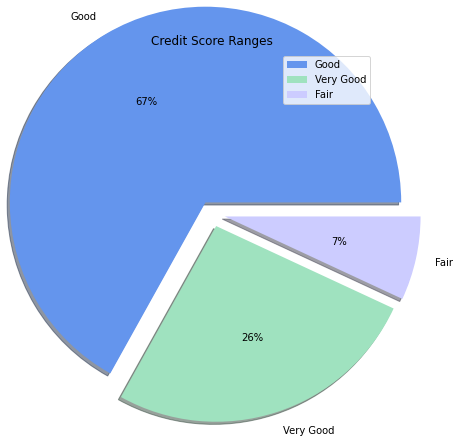

In [39]:
#The diagram below is showing the break down of the credit scores, over 60% of the customers have a good credit score which
#simply means that if they take loans it might not end up as a bad loan
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["#6495ED", "#9FE2BF", "#CCCCFF"]
explode = [0.1] * len(categ.index)  # Optional: Set explode values if desired

ax.pie(categ.values, labels=categ.index, shadow=True, autopct='%.0f%%', colors=colors, explode=explode, radius=1.5)
ax.set_title("Credit Score Ranges")
ax.legend(categ.index)

plt.show()

<AxesSubplot:xlabel='Credit Score', ylabel='count'>

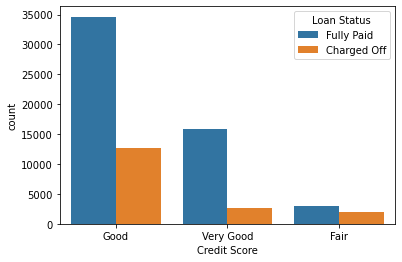

In [40]:
#Analyis per credit score based on their loan status
sns.countplot(x=credit["Credit Score"], hue=credit["Loan Status"])

# Purpose

In [41]:
# showing percentage of each purpose
credit_purpose_percentage = credit.groupby("Purpose").size() / len(credit) * 100
credit_purpose_percentage

Purpose
Business Loan            1.521395
Buy House                0.648208
Buy a Car                1.297530
Debt Consolidation      78.892032
Educational Expenses     0.101352
Home Improvements        5.832758
Medical Bills            1.094825
Other                    3.209855
Take a Trip              0.543515
major_purchase           0.367541
moving                   0.150358
other                    5.830530
renewable_energy         0.008910
small_business           0.284009
vacation                 0.099125
wedding                  0.116945
dtype: float64

N:B
Nearly 80% of loans are taken out to consolidate debt.
Debt consolidation is the process of taking out a new loan to pay off multiple existing debts. This can be a good option for people who are struggling to make multiple monthly payments, or who have high interest rates on their existing debt

<AxesSubplot:>

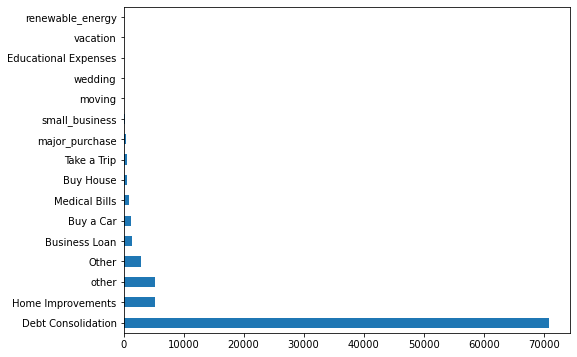

In [42]:
#This code calculates the count of each unique purpose in the "Purpose" column and visualizes it using a horizontal bar plot. 
#This helps to understand the distribution and relative frequencies of different purposes in the dataset.
credit_purpose_counts = credit['Purpose'].value_counts()
plt.figure(figsize=(8, 6))
credit_purpose_counts.plot(kind='barh')

# Years in current Job

<AxesSubplot:xlabel='Years of Credit History', ylabel='Density'>

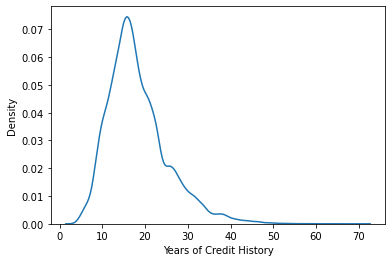

In [43]:
#This generates a KDE plot to visualize the distribution of the "Years of Credit History" variable in the "credit".
sns.kdeplot(data=credit, x="Years of Credit History")

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

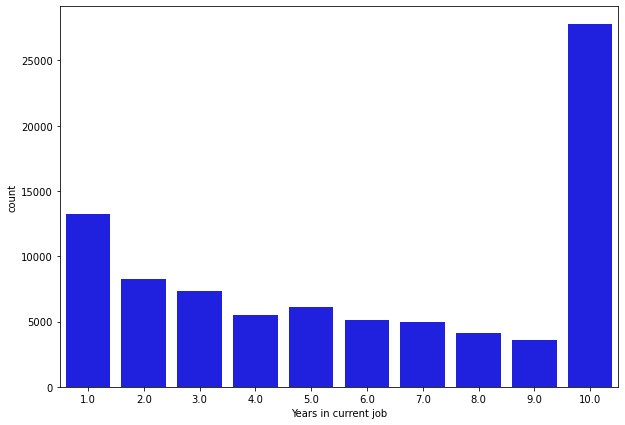

In [44]:
#This Visual converts the "Years in current job" column to numeric values, and then creates a countplot to visualize the distribution of years in the current job 
credit['Years in current job'] = credit['Years in current job'].apply(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 7))
sns.countplot(data=credit, x='Years in current job', color ="blue")

In [46]:
credit['Years in current job'].value_counts()

10.0    27755
1.0     13197
2.0      8254
3.0      7339
5.0      6136
4.0      5511
6.0      5134
7.0      4989
8.0      4121
9.0      3547
Name: Years in current job, dtype: int64

In [47]:
credit['Years in current job'].describe()

count    85983.000000
mean         5.961806
std          3.500484
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: Years in current job, dtype: float64

In [48]:
credit['Years in current job'].isnull().sum()

3803

Filling Nan values with the same distribiution of values

In [52]:
filing=credit["Years in current job"].unique()

In [53]:
filing=np.sort(filing)

In [54]:
filing

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [55]:
# deleting Nan value
fill=np.delete(filing,10)

In [56]:
fill

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [57]:
# getting the probability of each value 
prop = credit["Years in current job"].sort_values().value_counts(normalize=True, sort=False) 

In [58]:
# convert the series to list 
prop = prop.to_list()

In [59]:
prop

[0.1534838281985974,
 0.0959957200842027,
 0.0853540816207855,
 0.06409406510589302,
 0.07136294383773537,
 0.05970947745484573,
 0.058023097589058305,
 0.047928078806275656,
 0.041252340578951656,
 0.3227963667236547]

In [60]:
#filling Nan 
credit["Years in current job"].fillna(np.random.choice(fill,p=prop),inplace=True)

In [61]:
credit["Years in current job"].value_counts()

10.0    27755
1.0     13197
2.0      8254
9.0      7350
3.0      7339
5.0      6136
4.0      5511
6.0      5134
7.0      4989
8.0      4121
Name: Years in current job, dtype: int64

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

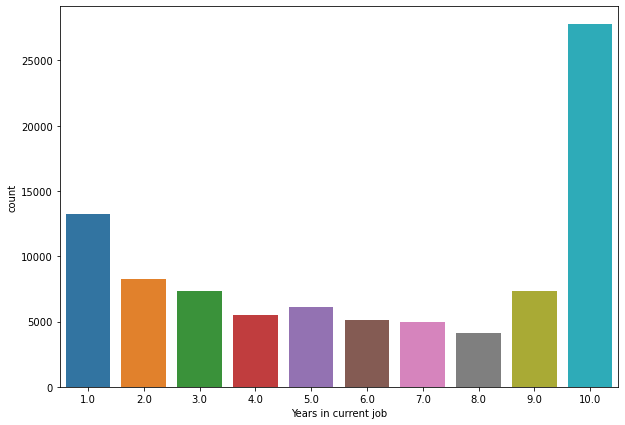

In [62]:
# after filling nan values
plt.figure(figsize = (10,7))
sns.countplot(credit['Years in current job'])

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

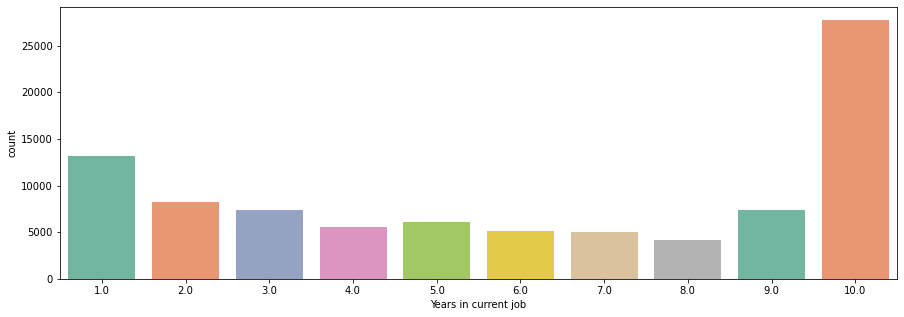

In [63]:
plt.figure(figsize = (15,5))
sns.countplot(x= credit["Years in current job"], palette="Set2")

# Annual Income

In [64]:
credit["Annual Income"].describe()

count    7.063100e+04
mean     1.375894e+06
std      1.104852e+06
min      7.662700e+04
25%      8.479320e+05
50%      1.168975e+06
75%      1.648915e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [65]:
credit["Annual Income"].median()

1168975.0

In [66]:
credit["Annual Income"].mean()

1375894.3876909572

In [67]:
## Filling Nan values with median :
credit["Annual Income"].fillna(credit["Annual Income"].mean(), inplace=True)

In [68]:
credit["Annual Income"].isna().sum()

0

In [69]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89786 entries, 0 to 100000
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   89785 non-null  object 
 1   Current Loan Amount           89785 non-null  float64
 2   Term                          89785 non-null  object 
 3   Credit Score                  70631 non-null  object 
 4   Annual Income                 89786 non-null  float64
 5   Years in current job          89786 non-null  float64
 6   Home Ownership                89785 non-null  object 
 7   Purpose                       89785 non-null  object 
 8   Monthly Debt                  89785 non-null  float64
 9   Years of Credit History       89785 non-null  float64
 10  Months since last delinquent  41448 non-null  float64
 11  Number of Open Accounts       89785 non-null  float64
 12  Number of Credit Problems     89785 non-null  float64
 13  

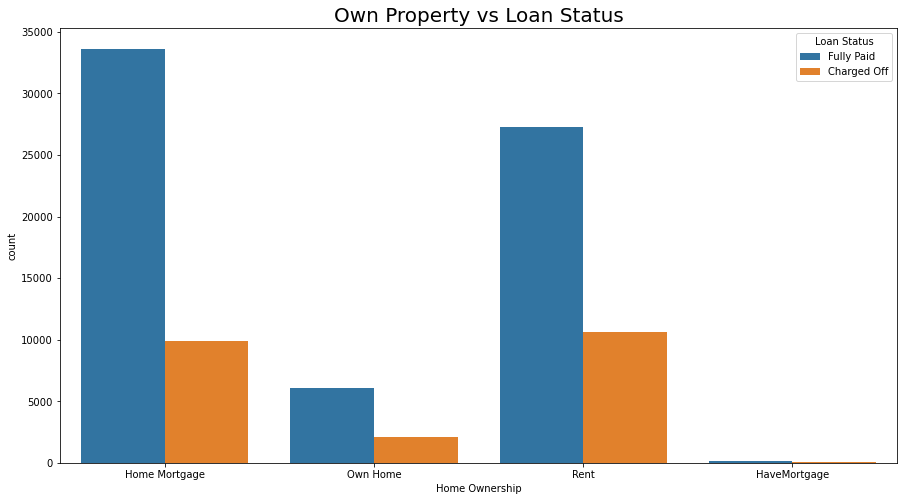

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(x='Home Ownership',data=credit,hue='Loan Status')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.show()

This Visual compare the "Home Ownership" categories with the "Loan Status" categories in the "credit" DataFrame. It provides insights into the distribution of loan statuses based on different home ownership categories.